In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [164]:
ticker_list = ["SPY"]

In [165]:
def load_data(symbol):
    
    data = pd.read_csv(f"./data/{symbol}.csv")
    
    return data

In [166]:
def compute_returns(data):
    
    data = 100*(data-data[0])/data[0]
    
    return data

In [167]:
def compute_change(current_price, purchase_price_array):
    
    data = 100*(current_price-purchase_price_array)/purchase_price_array
    
    return data

In [168]:
data_list = []

for ticker in ticker_list:
    data = load_data(ticker)
    data = compute_returns(data["Close"])
    data_list.append(data)
    

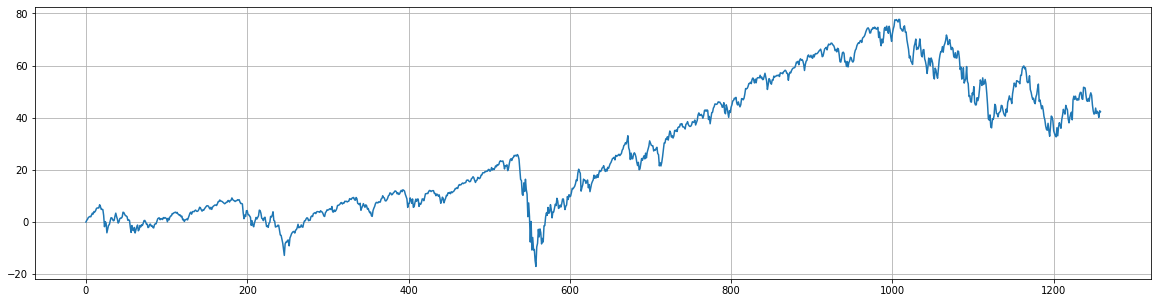

In [169]:
plt.figure(figsize=(20, 5))
plt.grid()

for price in data_list:
    plt.plot(price)
    
plt.show()

In [170]:
data = load_data("SPY")

In [171]:
price = data["Close"].values

In [172]:
# invest every month, which means every 21 trading days per month on average

In [173]:
# parameters

invest_at_top = 50
invest_at_bottom = 100
n_years_look_back = 1

n_trading_days_look_back = n_years_look_back*12*21

In [174]:
def compute_howmuch_to_invest(current_price, all_time_high, period_low, invest_at_top = 0.5, invest_at_bottom = 1):
    
    b = (invest_at_top - invest_at_bottom)/(all_time_high - period_low)
    a = invest_at_bottom - (b*period_low)
    
    x = a + current_price * b
    
    return x

In [175]:
def compute_returns(n_trading_days_look_back, invest_at_top, invest_at_bottom):

    list_amount_and_price = []
    amount_to_invest = 1 # we start with 1 unit to invest (a sum that we can save every month to invest)

    for i in range(1, len(price)):

        until_present_prices = price[:i] # this is to make sure we avoid future leakage

        if (i % 21 == 0) and (i >= n_trading_days_look_back):

            current_price = until_present_prices[i-1]
            period_low = np.min(until_present_prices[-n_trading_days_look_back:])
            all_time_high = np.max(until_present_prices)

            percentage_to_invest = compute_howmuch_to_invest(current_price, all_time_high, period_low, 
                                                             invest_at_top, invest_at_bottom)

            amount_invested = amount_to_invest*(percentage_to_invest/100)
            assert amount_invested <= amount_to_invest, "problemo"

            list_amount_and_price.append((amount_invested, current_price, amount_to_invest))
            amount_to_invest = 1 + amount_to_invest-amount_invested
    
    investment_list = np.array([val[0] for val in list_amount_and_price])
    price_list = np.array([val[1] for val in list_amount_and_price])

    changes_list = compute_change(price[-1], np.array(price_list))
    changes_list = 1 + changes_list/100

    # this is the number we are interested in optimising
    returns = 100*(np.sum(investment_list*changes_list)-len(investment_list))/len(investment_list)
    
    return returns

In [176]:
returns_list = []

for p in np.arange(0, 101, 1):
    
    returns = compute_returns(n_trading_days_look_back, p, invest_at_bottom)
    returns_list.append(returns)

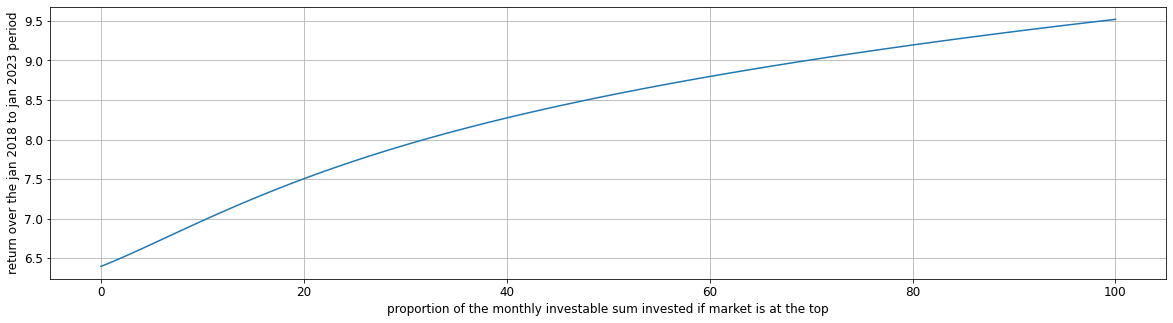

In [192]:
plt.figure(figsize=(20, 5))
plt.grid()
plt.xlabel("proportion of the monthly investable sum invested if market is at the top", size=12)
plt.ylabel("return over the jan 2018 to jan 2023 period",  size=12)
plt.xticks(size=12)
plt.yticks(size=12)
plt.plot(returns_list)  
plt.savefig(f'graph_dca.pdf', dpi=600, bbox_inches='tight')
plt.show()